In [118]:
import tensorflow as tf
import numpy as np
import h5py
from keras.utils import to_categorical
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [126]:
ds = h5py.File("train_catvnoncat.h5", "r")

In [125]:
xtr = np.array(ds['train_set_x'])

In [127]:
ytr = np.array(np.array(ds['train_set_y']))

In [128]:
ds2 = h5py.File("test_catvnoncat.h5", "r")

In [53]:
xts = np.array(ds2['test_set_x'])

In [129]:
yts = np.array(ds2['test_set_y'])

In [62]:
np.save("imgs", np.array(imgs))

In [132]:
np.save("labels", np.array(label))

In [59]:
imgs = np.append(arr = xtr, values = xts, axis = 0)

In [69]:
yts = yts.reshape(-1, 1)

In [130]:
labels = np.append(ytr, yts, 0).reshape(-1, 1)

In [131]:
labels.shape

(259, 1)

In [94]:
label = to_categorical(labels)

In [119]:
imgs = np.load("imgs.npy")/255

In [120]:
labels = np.load("labels.npy")

In [121]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 12288])
Y = tf.placeholder(dtype = tf.float32, shape = [None, 1])

In [122]:
W1 = tf.Variable(initial_value = tf.random_normal(shape = (12288, 1024)))
b1 = tf.Variable(initial_value = tf.random_normal(shape = (1, 1024)))
Z1 = tf.matmul(X, W1) + b1
A1 = tf.nn.relu(Z1)/np.max(Z1)

In [123]:
W2 = tf.Variable(initial_value = tf.random_normal(shape = (1024, 512)))
b2 = tf.Variable(initial_value = tf.random_normal(shape = (1, 512)))
Z2 = tf.matmul(A1, W2) + b2
A2 = tf.nn.relu(Z2)/np.max(Z2)

In [124]:
W3 = tf.Variable(initial_value = tf.random_normal(shape = (512, 256)))
b3 = tf.Variable(initial_value = tf.random_normal(shape = (1, 256)))
Z3 = tf.matmul(A2, W3) + b3
A3 = tf.nn.relu(Z3)/np.max(Z3)

In [125]:
W4 = tf.Variable(initial_value = tf.random_normal(shape = (256, 128)))
b4 = tf.Variable(initial_value = tf.random_normal(shape = (1, 128)))
Z4 = tf.matmul(A3, W4) + b4
A4 = tf.nn.relu(Z4)/np.max(Z4)

In [126]:
W5 = tf.Variable(initial_value = tf.random_normal(shape = (128, 64)))
b5 = tf.Variable(initial_value = tf.random_normal(shape = (1, 64)))
Z5 = tf.matmul(A4, W5) + b5
A5 = tf.nn.relu(Z5)/np.max(Z5)

In [127]:
W6 = tf.Variable(initial_value = tf.random_normal(shape = (64, 16)))
b6 = tf.Variable(initial_value = tf.random_normal(shape = (1, 16)))
Z6 = tf.matmul(A5, W6) + b6
A6 = tf.nn.relu(Z6)/np.max(Z6)

In [128]:
W7 = tf.Variable(initial_value = tf.random_normal(shape = (16, 1)))
b7 = tf.Variable(initial_value = tf.random_normal(shape = (1, 1)))
Z7 = tf.matmul(A6, W7) + b7
A7 = tf.sigmoid(Z7)

In [129]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = Y, logits = A7))

In [130]:
opt = tf.train.AdagradOptimizer(learning_rate = 0.1)

In [131]:
train_step = opt.minimize(loss)

In [132]:
sess = tf.Session()

In [133]:
sess.run(tf.global_variables_initializer())

In [134]:
def train(epochs = 20):
    for e in range(epochs):
        L, _ = sess.run(fetches = [loss, train_step], feed_dict={X: imgs.reshape(-1, 64*64*3), Y: labels})
        if e % 50 == 0:
            print("epoch {} | Loss: {}".format(e, L))

In [ ]:
train(50000)

epoch 0 | Loss: 0.751636803150177
epoch 50 | Loss: 0.7046946883201599
epoch 100 | Loss: 0.6984577178955078
epoch 150 | Loss: 0.696494460105896
epoch 200 | Loss: 0.6955735087394714
epoch 250 | Loss: 0.6950456500053406
epoch 300 | Loss: 0.6947051286697388
epoch 350 | Loss: 0.6944679021835327
epoch 400 | Loss: 0.6942932605743408
epoch 450 | Loss: 0.6941595077514648
epoch 500 | Loss: 0.6940537095069885
epoch 550 | Loss: 0.6939679980278015
epoch 600 | Loss: 0.6938972473144531
epoch 650 | Loss: 0.6938377618789673
epoch 700 | Loss: 0.6937870979309082
epoch 750 | Loss: 0.6937433481216431
epoch 800 | Loss: 0.6937052607536316
epoch 850 | Loss: 0.6936718225479126
epoch 900 | Loss: 0.6936421394348145
epoch 950 | Loss: 0.6936157941818237
epoch 1000 | Loss: 0.6935920119285583
epoch 1050 | Loss: 0.6935704946517944
epoch 1100 | Loss: 0.6935511231422424
epoch 1150 | Loss: 0.6935334801673889
epoch 1200 | Loss: 0.69351726770401
epoch 1250 | Loss: 0.6935024261474609
epoch 1300 | Loss: 0.6934887170791626
e

epoch 10850 | Loss: 0.6931894421577454
epoch 10900 | Loss: 0.6931892037391663
epoch 10950 | Loss: 0.6931890249252319
epoch 11000 | Loss: 0.6931889057159424
epoch 11050 | Loss: 0.6931886672973633
epoch 11100 | Loss: 0.6931885480880737
epoch 11150 | Loss: 0.6931883692741394
epoch 11200 | Loss: 0.6931881904602051
epoch 11250 | Loss: 0.693187952041626
epoch 11300 | Loss: 0.6931878328323364
epoch 11350 | Loss: 0.6931876540184021
epoch 11400 | Loss: 0.6931874752044678
epoch 11450 | Loss: 0.6931872963905334
epoch 11500 | Loss: 0.6931871175765991
epoch 11550 | Loss: 0.6931869387626648
epoch 11600 | Loss: 0.6931867599487305
epoch 11650 | Loss: 0.6931866407394409
epoch 11700 | Loss: 0.6931865215301514
epoch 11750 | Loss: 0.6931862831115723
epoch 11800 | Loss: 0.6931861639022827
epoch 11850 | Loss: 0.6931859850883484
epoch 11900 | Loss: 0.6931858062744141
epoch 11950 | Loss: 0.6931856274604797
epoch 12000 | Loss: 0.6931855082511902
epoch 12050 | Loss: 0.6931853294372559
epoch 12100 | Loss: 0.6931

epoch 21400 | Loss: 0.6931690573692322
epoch 21450 | Loss: 0.6931689381599426
epoch 21500 | Loss: 0.6931688785552979
epoch 21550 | Loss: 0.6931688189506531


In [116]:
d = sess.run(A7, feed_dict={X: imgs[27].reshape(-1, 12288)})

In [117]:
d

array([[0., 0.]], dtype=float32)

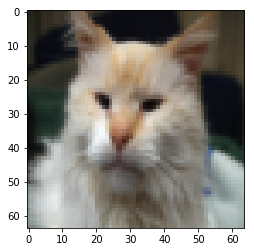

In [118]:
plt.imshow(imgs[27])